In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv('/home/dell/python_machine_learning/disease/csv/heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Filtering the data

In [4]:
x=data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]
y=data['target']

In [5]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [6]:
y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

# Logistic Regression

spliting the data into training set and test set

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Standardize features by removing the mean and scaling to unit variance

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_pred = classifier.predict(x_test)

In [11]:
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 0 1]


In [12]:
print(y_test)

225    0
152    1
228    0
201    0
52     1
245    0
175    0
168    0
223    0
217    0
111    1
135    1
218    0
12     1
15     1
66     1
97     1
90     1
198    0
103    1
22     1
212    0
226    0
264    0
133    1
216    0
275    0
270    0
154    1
55     1
      ..
116    1
188    0
246    0
7      1
45     1
129    1
122    1
63     1
124    1
227    0
146    1
302    0
26     1
108    1
89     1
74     1
153    1
64     1
296    0
287    0
286    0
236    0
126    1
73     1
20     1
46     1
160    1
232    0
181    0
27     1
Name: target, Length: 76, dtype: int64


In [13]:
np.average(np.abs(y_test-y_pred))

0.17105263157894737

In [14]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.17105263157894737

In [15]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')

0.8220140515222483

In [16]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.79


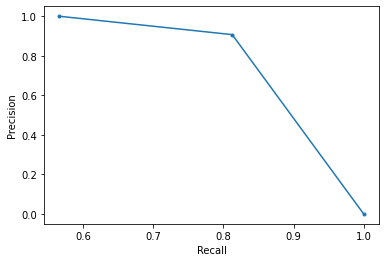

In [21]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

xx,yy,_ =precision_recall_curve(y_test,y_pred)

plt.plot(xx, yy, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


In [23]:
from sklearn.metrics import auc
lr_f1, lr_auc = f1_score(y_test,y_pred), auc(xx, yy)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.857 auc=0.320


# ROC curves should be used when there are roughly equal numbers of observations for each class.
# Precision-Recall curves should be used when there is a moderate to large class imbalance.

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.817


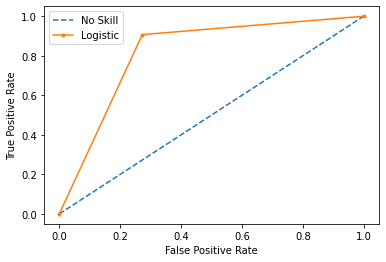

In [27]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[24,  9],
       [ 4, 39]])

Text(0.5, 15.0, 'Predicted label')

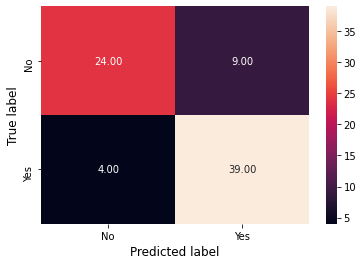

In [33]:

import seaborn as sn
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["No", "Yes"] , yticklabels = ["No", "Yes"],)
plt.ylabel('True label',fontsize=12)
plt.xlabel('Predicted label',fontsize=12)


In [29]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,digits=2))


             precision    recall  f1-score   support

          0       0.86      0.73      0.79        33
          1       0.81      0.91      0.86        43

avg / total       0.83      0.83      0.83        76



In [15]:
accuracy_score(y_pred,y_test)

0.8289473684210527

# Decision Tree

In [16]:
import pandas as pd
from sklearn import tree # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt

In [17]:
col= ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']


In [22]:
data=pd.read_csv('/home/dell/python_machine_learning/disease/csv/heart.csv',names=col, header = 0)
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
features=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar']

In [24]:
x= data[features] # Features
y = data.target

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1) 

In [26]:
clf = tree.DecisionTreeClassifier()

In [27]:
clf = clf.fit(X_train,y_train)

In [28]:
y_pred = clf.predict(X_test)

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7142857142857143


In [30]:
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydotplus

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart_disease.png')
Image(graph.create_png())
plt.show()

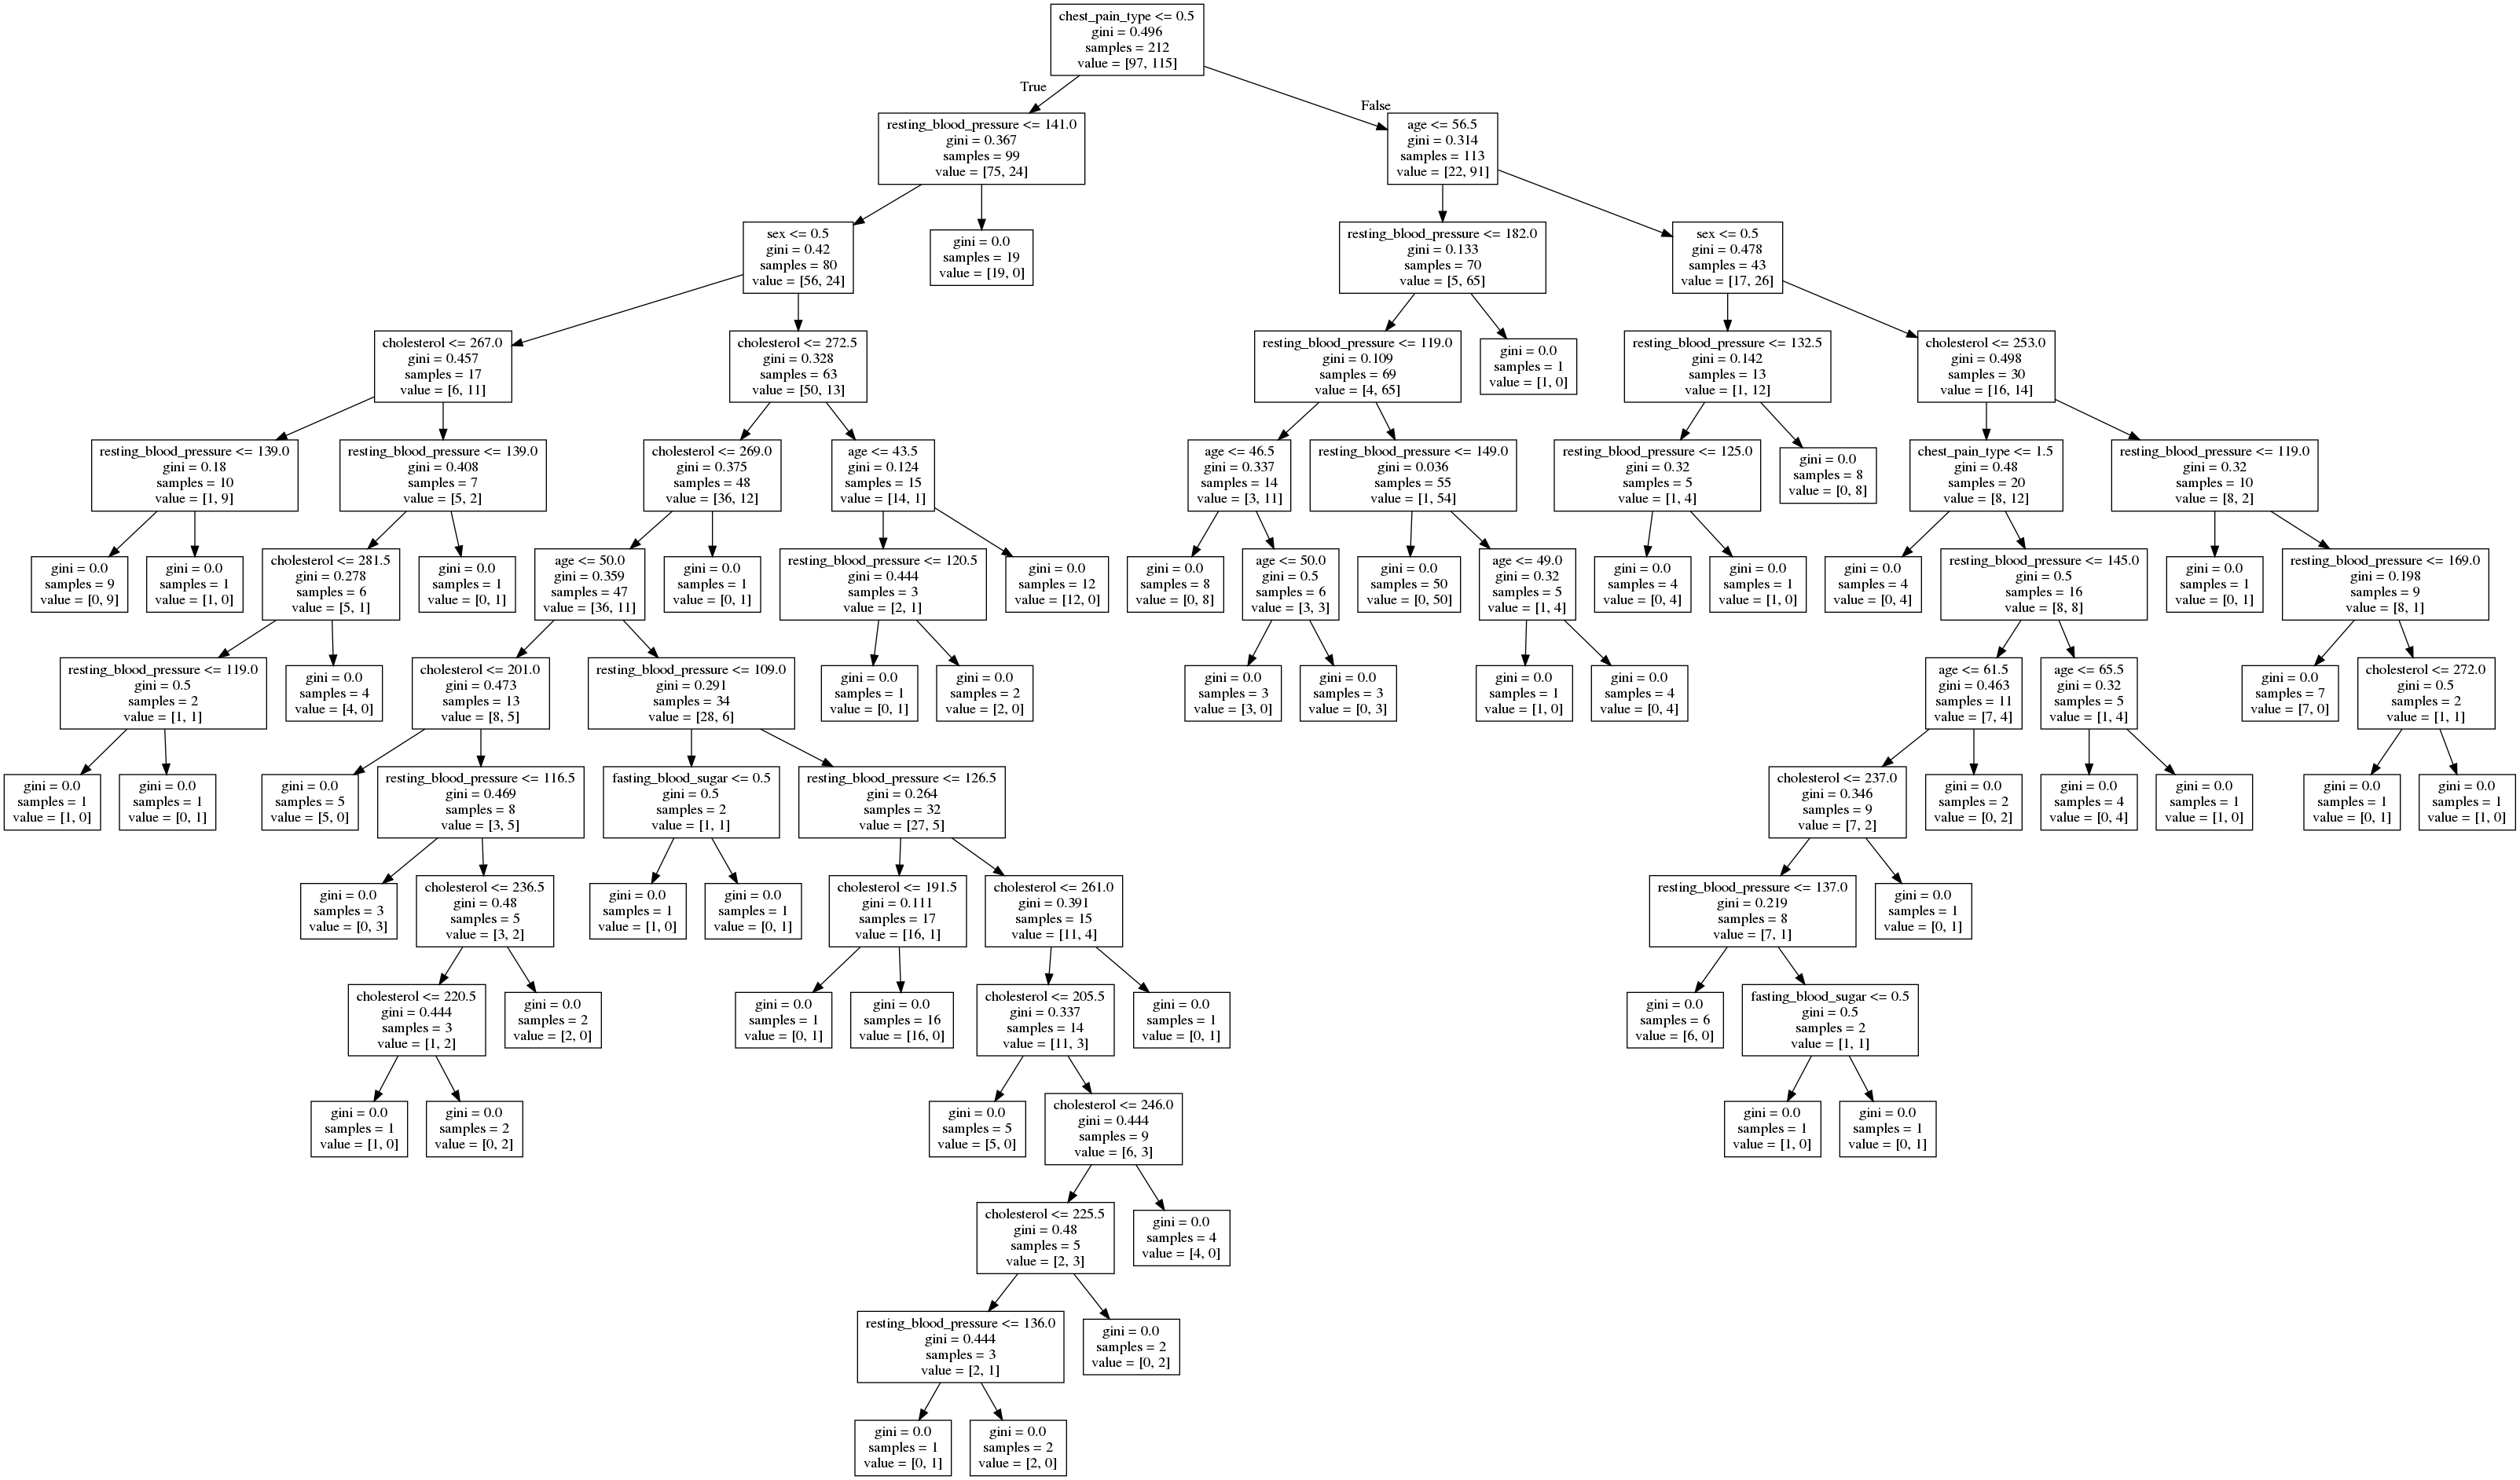

In [31]:
dot_data=StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# KMeans

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1]


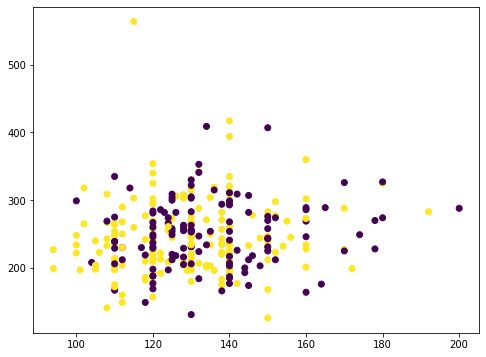

In [32]:
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from numpy import random,float

dt=data[[ 'resting_blood_pressure', 'cholesterol']]
model=KMeans(n_clusters=2)

#Note scaling the data to normalize it! important for good results.

model=model.fit(scale(data))

#we can look at the clusters each data point was assigned to
print(model.labels_)

#and we will visualize it

plt.figure(figsize=(8,6))
plt.scatter(dt['resting_blood_pressure'],dt['cholesterol'],c=model.labels_.astype(float))

plt.show()